### Problem Statemnet

Use scikit learn’s LogisticRegression class to model and make predictions on the
following two datasets:

1) https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset
Using the model, make predictions of the demand for bikes when the windspeed is
minimum and maximum. Plot the ROC curve.

In [100]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,auc,classification_report
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
day = pd.read_csv("day.csv")
hour = pd.read_csv("hour.csv")

In [3]:
day.shape

(731, 16)

In [4]:
hour.shape

(17379, 17)

In [5]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Since we need to predict the Demand of the bike based on the Windspeed, So we need to caterorize the demand.
Either it can be "1" or "0". So i am keeping cutt-off at 25 percentile

In [8]:
day['demand'] = day.cnt.map(lambda x:1 if x>3152 else 0)

In [9]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,demand
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,0
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,0
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,0
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,0
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,0


In [10]:
day.loc[day.windspeed==day.windspeed.max()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,demand
49,50,2011-02-19,1,0,2,0,6,0,1,0.399167,0.391404,0.187917,0.507463,532,1103,1635,0


In [11]:
day.loc[day.windspeed==day.windspeed.min()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,demand
279,280,2011-10-07,4,0,10,0,5,1,1,0.510833,0.504404,0.684167,0.022392,949,4036,4985,1


In [12]:
day.loc[day.cnt==day.cnt.max()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,demand
623,624,2012-09-15,3,1,9,0,6,0,1,0.608333,0.585867,0.501667,0.247521,3160,5554,8714,1


In [13]:
day.loc[day.cnt==day.cnt.min()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,demand
667,668,2012-10-29,4,1,10,0,1,1,3,0.44,0.4394,0.88,0.3582,2,20,22,0


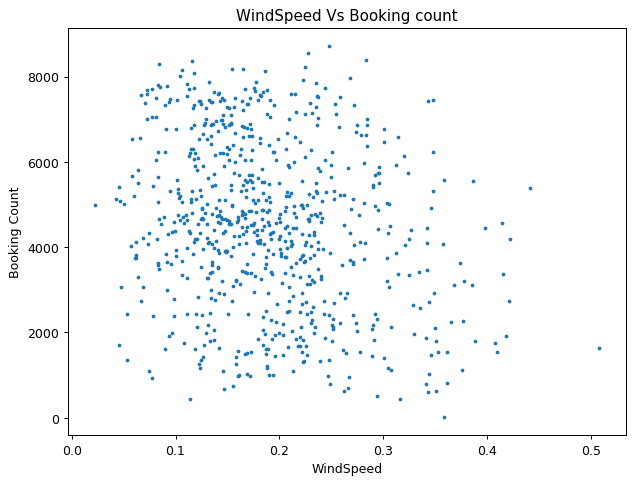

In [14]:
plt.figure(figsize=(8,6),dpi=90)
plt.title("WindSpeed Vs Booking count")
plt.xlabel("WindSpeed")
plt.ylabel("Booking Count")
plt.scatter(day.windspeed,day.cnt,s=4)
plt.show()

From the above Scatter plot we can conclude the the Demand is not directly proportional to Windspeed

Checking distribution of Demand based on the other dependent variables

In [15]:
day.groupby('season')['cnt'].sum()

season
1     471348
2     918589
3    1061129
4     841613
Name: cnt, dtype: int64

In [16]:
day.groupby('holiday')['cnt'].sum()

holiday
0    3214244
1      78435
Name: cnt, dtype: int64

In [17]:
day.groupby('weekday')['cnt'].sum()

weekday
0    444027
1    455503
2    469109
3    473048
4    485395
5    487790
6    477807
Name: cnt, dtype: int64

In [18]:
day.groupby('workingday')['cnt'].sum()

workingday
0    1000269
1    2292410
Name: cnt, dtype: int64

In [19]:
day.demand.value_counts()

1    548
0    183
Name: demand, dtype: int64

In [20]:
day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
demand        0
dtype: int64

In [21]:
day.dropna(inplace=True)

In [22]:
day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
demand        0
dtype: int64

In [23]:
X = day[['windspeed']].values
Y = day[['demand']].values

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [26]:
clr = LogisticRegression()

In [27]:
clr.fit(X_train,y_train)

C:\Users\v-avkuma\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\v-avkuma\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [33]:
pred = clr.predict(X_test)

In [34]:
X_test.shape

(242, 1)

In [35]:
y_test.shape

(242, 1)

In [36]:
accuracy_score(y_test,pred)

0.7148760330578512

In [61]:
pred_prob = clr.predict_proba(X_test)
fpr,tpr,threshold = roc_curve(y_test,pred_prob[:,1])
auc_=auc(fpr, tpr)

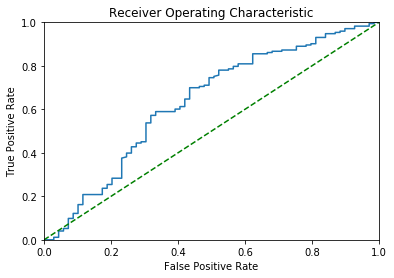

In [73]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1],'g--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# MNIST Dataset

Use from sklearn.datasets import fetch_mldata

In [74]:
from sklearn.datasets import fetch_mldata
from sklearn import datasets
import tempfile

In [75]:
test_data_home = tempfile.mkdtemp()
digits=datasets.load_digits()

In [76]:
data = pd.DataFrame(data= np.c_[digits['data'], digits['target']])

In [80]:
data = data.rename(index=str,columns={64: "label"})

In [82]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4.0


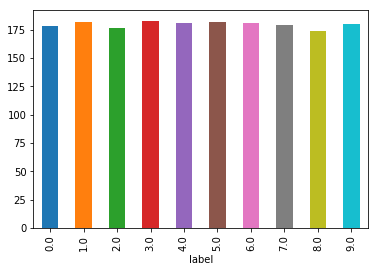

In [95]:
data.groupby('label')[0].count().plot(kind='bar')
plt.show()

In [96]:
from sklearn.preprocessing import StandardScaler
y = data.label.values
X = data.drop('label',axis=1).values
X_std = StandardScaler().fit_transform(X)

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.33, random_state=44)

model=LogisticRegression()
model.fit(X_train, y_train)

C:\Users\v-avkuma\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\v-avkuma\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [101]:
y_pred=model.predict(X_test)
probs = model.predict_proba(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9730639730639731
[[63  0  0  0  0  0  0  0  0  0]
 [ 0 67  2  0  0  0  0  0  1  0]
 [ 0  0 55  0  0  0  0  0  0  0]
 [ 0  0  0 59  0  0  0  1  0  0]
 [ 0  0  0  0 53  0  0  0  0  0]
 [ 0  0  0  0  0 59  1  0  0  0]
 [ 0  0  0  0  0  0 65  0  0  0]
 [ 0  0  0  0  0  0  0 53  1  0]
 [ 0  1  0  1  0  0  1  1 47  1]
 [ 0  0  0  0  0  0  0  1  4 57]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        63
         1.0       0.99      0.96      0.97        70
         2.0       0.96      1.00      0.98        55
         3.0       0.98      0.98      0.98        60
         4.0       1.00      1.00      1.00        53
         5.0       1.00      0.98      0.99        60
         6.0       0.97      1.00      0.98        65
         7.0       0.95      0.98      0.96        54
         8.0       0.89      0.90      0.90        52
         9.0       0.98      0.92      0.95        62

   micro avg       0.97      0.97      0.97       594
